In [36]:
!where python
%pip install ucimlrepo

/Users/khaspper/anaconda3/bin/python
/Users/khaspper/anaconda3/bin/python
Note: you may need to restart the kernel to use updated packages.


In [37]:
# This tells the NB to keep an eye on the other Python files I import so if i change them pyter will automatically reload the latest version so we do not have to manually re-import stuff
%load_ext autoreload 

# This means it's gonna reload everything everytime I run a cell 
%autoreload 2

# This tells Jupyter to show graphs and charts inside the notebook instead of popping up in separate windows
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
# Standard imports
import os

# Third-party imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# This updates plotting styles this is seaborns plotting styles
sns.set()
# print(df.head())

In [39]:
df = pd.read_csv('./auto+mpg/auto-mpg.data', delim_whitespace=True, header=None)
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower',
              'weight', 'acceleration', 'model year', 'origin', 'car name']

#! Dropping columns I do NOT want 
df = df.drop(columns=['model year', 'acceleration', 'car name', 'origin', 'cylinders',])

#! Dropping rows with missing values
df['horsepower'].replace('?', np.nan, inplace=True)
df['horsepower'] = df['horsepower'].astype(float)
df_clean = df.dropna()
df_clean

,mpg,displacement,horsepower,weight
0,18.0,307.0,130.0,3504.0
1,15.0,350.0,165.0,3693.0
2,18.0,318.0,150.0,3436.0
3,16.0,304.0,150.0,3433.0
4,17.0,302.0,140.0,3449.0
...,...,...,...,...
393,27.0,140.0,86.0,2790.0
394,44.0,97.0,52.0,2130.0
395,32.0,135.0,84.0,2295.0
396,28.0,120.0,79.0,2625.0


/Users/khaspper/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


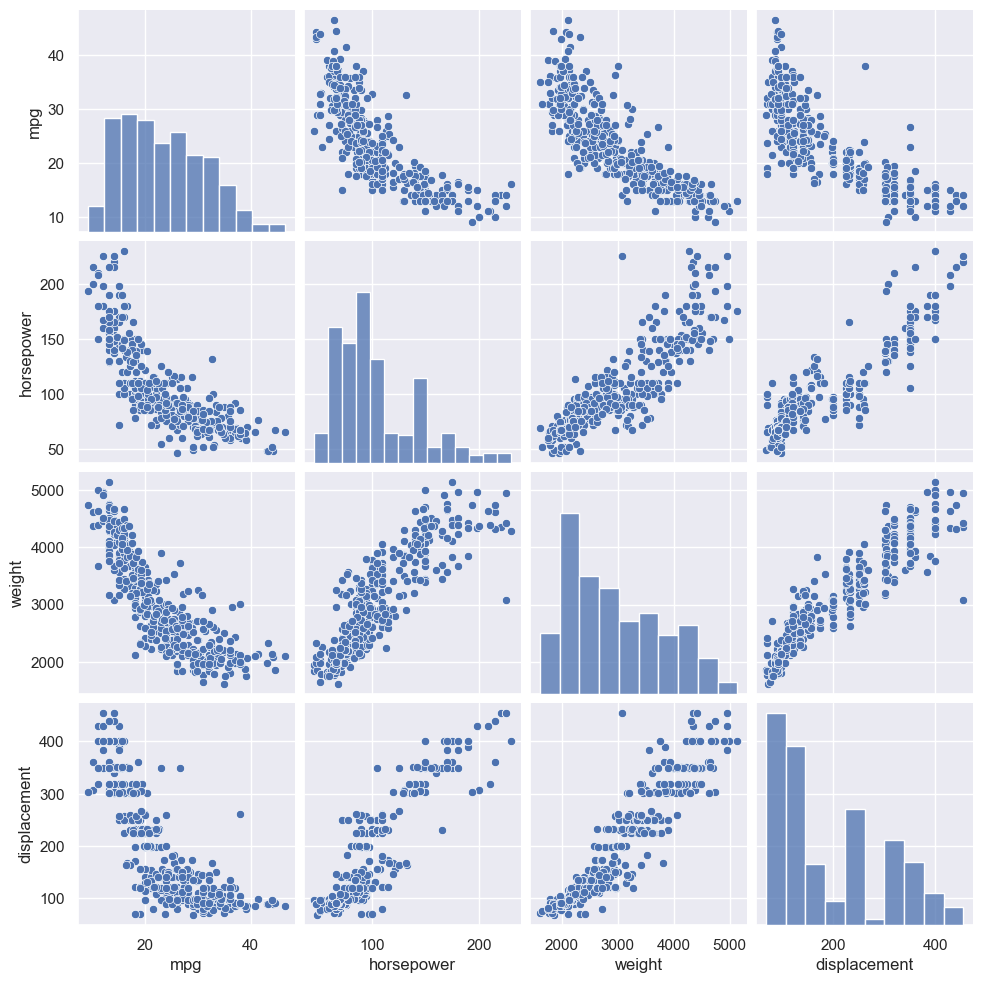

In [40]:
sns.pairplot(df_clean[['mpg', 'horsepower', 'weight', 'displacement']])
plt.show()

In [41]:
# This is to define X (features) and Y (target)
X = df_clean[['horsepower', 'weight', 'displacement']]
y = df_clean['mpg']

In [42]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
fold_results = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X_scaled), 1):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    coefs = model.coef_

    fold_results.append({
        'Fold': fold,
        'Horsepower Coef': coefs[0],
        'Weight Coef': coefs[1],
        'Displacement Coef': coefs[2],
        'RMSE': rmse
    })

results_df = pd.DataFrame(fold_results)
print(results_df)

   Fold  Horsepower Coef  Weight Coef  Displacement Coef      RMSE
0     1        -1.528463    -4.469687          -0.791723  4.170198
1     2        -1.735667    -4.477922          -0.709901  4.162047
2     3        -1.794711    -4.369634          -0.650546  4.353491
3     4        -1.857064    -4.618458          -0.270550  4.709866
4     5        -1.265840    -4.566043          -0.905701  4.398953
5     6        -1.610826    -4.571431          -0.480464  5.025100
6     7        -1.114528    -4.754356          -0.784364  4.821236
7     8        -1.838471    -4.556229          -0.350488  3.107398
8     9        -1.459254    -4.577988          -0.637044  3.322329
9    10        -1.798226    -4.440940          -0.465896  4.223758
